<center>
<img src="https://tensorflowkorea.files.wordpress.com/2020/12/4.-e18492e185a9e186abe1848ce185a1-e18480e185a9e186bce18487e185aee18492e185a1e18482e185b3e186ab-e18486e185a5e18489e185b5e186abe18485e185a5e18482e185b5e186bce18483e185b5e186b8e18485e185a5e.png?w=972" width="200" height="200"><br>
</center>

## 03-2 선형 회귀

### - k-최근접 이웃의 한계

앞서 사용한 데이터와 모델을 준비하자.

In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

이번 데이터를 훈련세트와 테스트 세트로 나누자. 특성 데이터는 2차원 배열로 변환하자.

In [2]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나누자.
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꾸자.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

최근접 이웃 개수를 3으로 하는 모델을 훈련하자. 

In [3]:
from sklearn.neighbors import KNeighborsRegressor

In [4]:
knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델을 훈련한다.
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [5]:
print(knr.predict([[50]]))

[1033.33333333]


위 모델은 50cm 농어의 무게를 1033g으로 예측했다. 하지만 이 농어의 무게는 실제 더 많이 나간다고 한다. 무엇이 문제일까?

훈련 세트와 50cm 농어 그리고 이 농어의 최근접 이웃을 산점도에 표시해보자.

앞서 배운 kneighbors() 메서드를 사용하면 가장 가까운 이웃까지의 거리와 이웃 샘플의 인덱스를 얻을 수 있다.

In [6]:
import matplotlib.pyplot as plt

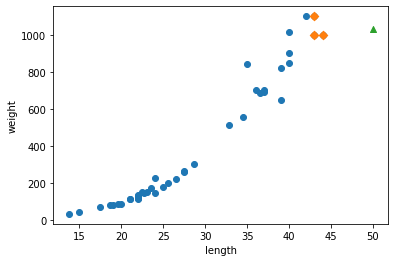

In [7]:
# 50cm 농어의 이웃을 구한다.
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그린다.
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그린다.
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()